In [2]:
import lpfet
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import essentials
import seaborn as sns
import matplotlib.colors as mcolors

import importlib
importlib.reload(lpfet)

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 6 site **chain** with only one non-zero potential
```
a-b-c-d-e-f
```
All depends on variable i - element of array x that sets potentials:


| site | external potential | 
| --- | --- |
| a | -i | 
| b | 0 |
| c | 0 |
| d | 0 |
| e | 0 |
| f | 0 |

In [2]:
from importlib import reload
reload(lpfet)

<module 'lpfet' from '/mnt/c/Users/tinc9/Documents/CNRS-offline/quantum_main_project/LPFET/lpfet.py'>

# Graphs based on the delta v_ext

In [4]:
lpfet.COMPENSATION_1_RATIO = 0.25
x = np.arange(0.05, 2.1, 0.025)
# x = np.arange(0.01, 0.1, 0.005)
U_param = 3
n_electron = 6
n_sites = 6
name = 'chain1'
mol1 = lpfet.Molecule(n_sites, n_electron, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(n_sites, n_electron)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
energy_ref = []
energy = []
first = True
correction_dict_list = []
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(f'{i:.1f}, {i/max(x)*100:.1f}%: ', end=' ')
    pmv = i
    
    nodes_dict = dict()
    edges_dict = dict()
    eq_list = []
    for j in range(6):
        if j == 0:
            nodes_dict[j] = {'v': - i, 'U': U_param}
        else:
            nodes_dict[j] = {'v': - 0, 'U': U_param}
        if j != 5:
            edges_dict[(j, j+1)] = 1
        eq_list.append([j])
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    mol1.self_consistent_loop(num_iter=30, tolerance=1E-6, oscillation_compensation=2)
    # mol1.optimize_solution(5, 0.2)
    mol1.calculate_energy(True)
    correction_dict_list.append(mol1.oscillation_correction_dict)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, mol_fci, energy_ref_i =mol1.compare_densities_fci(pass_object=mol_full)
    y_ref.append(y_ab.diagonal())
    
    energy.append(mol1.energy_contributions)
    energy_ref.append(energy_ref_i)

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 

E = np.array(energy, dtype=[('tot', float), ('kin', float), ('v_ext', float), ('u', float)])
E_ref = np.array(energy_ref, dtype=[('tot', float), ('kin', float), ('v_ext', float), ('u', float)])


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.1, 2.4%:  Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.50296877 0.49799933 0.49970669 0.49957324 0.49989324 0.49985874]
Eigenvalue energy: -3.766215843242715, calculated from contributions: -3.766215843242715
0.1, 3.6%:  Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.50445449 0.49699832 0.49955989 0.49935954 0.49983976 0.49978799]
Eigenvalue energy: -3.791401419029972, calculated from contributions: -3.791401419029972
0.1, 4.8%:  Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.50594181 0.49599652 0.49941291 0.49914548 0.49978619 0.49971709]
Eigenvalue energy: -3.8166613187384137, calculated from contributions: -3.8166613187384137
0.1, 6.0%:  Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.50743128 0.49499364 0.4992657  0.49893093 0.49973247 0.49964599]
Eigenvalue energy: -3.841995636014715, calculated from contributions: -3.841995636014

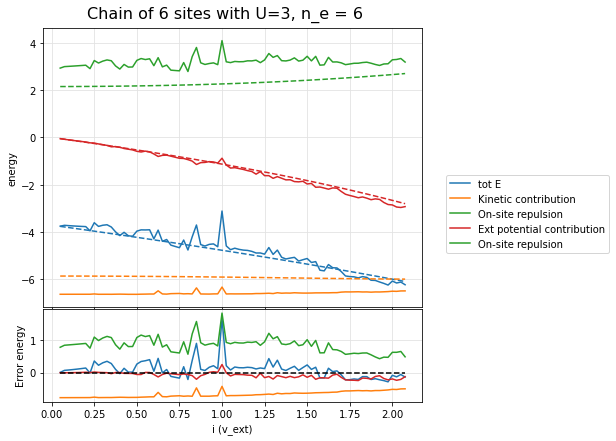

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.tight_layout() 
fig.subplots_adjust(hspace=0.01, top=0.93)
ax[0].grid(True, color='#E2E2E2')
ax[1].grid(True, color='#E2E2E2')
ax[0].plot(x, E['tot'], c=mpl.cm.get_cmap('tab10')(0), label='tot E')
ax[0].plot(x, E_ref['tot'], c=mpl.cm.get_cmap('tab10')(0), linestyle='--')
ax[0].plot(x, E['kin'], c=mpl.cm.get_cmap('tab10')(1), label='Kinetic contribution')
ax[0].plot(x, E_ref['kin'], c=mpl.cm.get_cmap('tab10')(1), linestyle='--')
ax[0].plot(x, E['u'], c=mpl.cm.get_cmap('tab10')(2), label='On-site repulsion')
ax[0].plot(x, E_ref['u'], c=mpl.cm.get_cmap('tab10')(2), linestyle='--')
ax[0].plot(x, E['v_ext'], c=mpl.cm.get_cmap('tab10')(3), label='Ext potential contribution')
ax[0].plot(x, E_ref['v_ext'], c=mpl.cm.get_cmap('tab10')(3), linestyle='--')
plt.xlabel("i (v_ext)")
ax[0].set_ylabel('energy')
ax[1].set_ylabel('Error energy')
ax[1].plot(x, E['tot'] - E_ref['tot'], c=mpl.cm.get_cmap('tab10')(0))
ax[1].plot(x, E['kin'] - E_ref['kin'], c=mpl.cm.get_cmap('tab10')(1))
ax[1].plot(x, E['u'] - E_ref['u'], c=mpl.cm.get_cmap('tab10')(2), label='On-site repulsion')
ax[1].plot(x, E['v_ext'] - E_ref['v_ext'], c=mpl.cm.get_cmap('tab10')(3))
ax[1].plot(x, [0]*len(x), c='k', linestyle='--')
fig.suptitle(f'Chain of 6 sites with U={U_param}, n_e = {n_electron}', fontsize=16)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(f'results/Chain1_filtered/Energy_errors_ne-{n_electron}_0.1.png', dpi=150,  bbox_inches='tight')

Text(0.5, 0.98, 'Chain of 6 sites with U=3, n_e = 6')

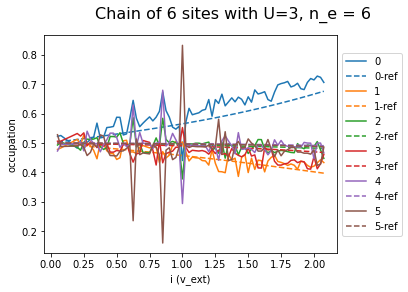

In [6]:

colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))


fig, ax = plt.subplots(1,1, figsize=(7,4))

for i in range(6):
    plt.plot(x, y_simple[:, i], c=mpl.cm.get_cmap('tab10')(i), label=str(i))
    plt.plot(x, y_ref[:, i], c=mpl.cm.get_cmap('tab10')(i), label=str(i)+'-ref', linestyle='--')
plt.xlabel("i (v_ext)")
# plt.xlim(-.6, 2.1)
plt.ylabel("occupation")
# plt.ylim(0,1)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(f'Chain of 6 sites with U={U_param}, n_e = {n_electron}', fontsize=16)
# plt.savefig(f'results/Chain1_filtered/Densities_ne-{n_electron}_0.1.png', dpi=150,  bbox_inches='tight')

v_ext = 1.25
u=3
ns=6
ne=6

# Graphs based on U

In [52]:
lpfet.COMPENSATION_1_RATIO = 0.25
step = 0.5
x = np.arange(0, 10, step)

n_electron = 6
n_sites = 6
name = 'chain1'
mol1 = lpfet.Molecule(n_sites, n_electron, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(n_sites, n_electron)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
energy_ref = []
energy = []
first = True
correction_dict_list = []
for i in x:
    U_param = i
    if not first:
        mol1.clear_object(name)
    first = False
    print(f'{i:.1f}, {i/max(x)*100:.1f}%: ', end=' ')
    pmv = 1.25
    
    nodes_dict = dict()
    edges_dict = dict()
    eq_list = []
    for j in range(6):
        nodes_dict[j] = {'v': (j - 2.5) * i, 'U': U_param}
        if j != 5:
            edges_dict[(j, j+1)] = 1
        eq_list.append([j])
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    mol1.self_consistent_loop(num_iter=30, tolerance=1E-6, oscillation_compensation=2)
    # mol1.optimize_solution(5, 0.2)
    mol1.calculate_energy(True)
    correction_dict_list.append(mol1.oscillation_correction_dict)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, mol_fci, energy_ref_i =mol1.compare_densities_fci(pass_object=mol_full)
    y_ref.append(y_ab.diagonal())
    
    energy.append(mol1.energy_contributions)
    energy_ref.append(energy_ref_i)

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 

E = np.array(energy, dtype=[('tot', float), ('kin', float), ('v_ext', float), ('u', float)])
E_ref = np.array(energy_ref, dtype=[('tot', float), ('kin', float), ('v_ext', float), ('u', float)])


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.0, 0.0%:  Loop 0, Loop 1, FCI densities (per spin): [0.5 0.5 0.5 0.5 0.5 0.5]
Eigenvalue energy: -6.987918414869869, calculated from contributions: -6.987918414869869
0.5, 5.3%:  Loop 0, Loop 1, Loop 2, FCI densities (per spin): [0.83816419 0.55433552 0.56006372 0.43993628 0.44566448 0.16183581]
Eigenvalue energy: -7.189829166250833, calculated from contributions: -7.189829166250833
1.0, 10.5%:  Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.96435638 0.76674767 0.5149293  0.4850707  0.23325233 0.03564362]
Eigenvalue energy: -8.872768394639293, calculated from contributions: -8.872768394639293
1.5, 15.8%:  Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.99308271 0.90506765 0.57995719 0.42004281 0.09493235 0.00691729]
Eigenvalue energy: -11.31763289554192, calculated from contributions: -11.31763289554192
2.0, 21.1%:  Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, FCI densi

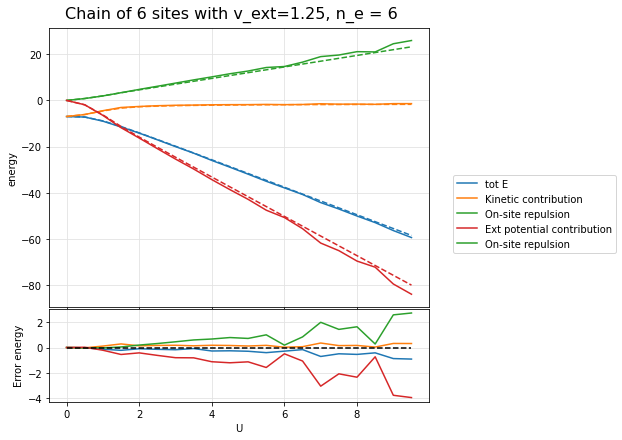

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.tight_layout() 
fig.subplots_adjust(hspace=0.01, top=0.93)
ax[0].grid(True, color='#E2E2E2')
ax[1].grid(True, color='#E2E2E2')
ax[0].plot(x, E['tot'], c=mpl.cm.get_cmap('tab10')(0), label='tot E')
ax[0].plot(x, E_ref['tot'], c=mpl.cm.get_cmap('tab10')(0), linestyle='--')
ax[0].plot(x, E['kin'], c=mpl.cm.get_cmap('tab10')(1), label='Kinetic contribution')
ax[0].plot(x, E_ref['kin'], c=mpl.cm.get_cmap('tab10')(1), linestyle='--')
ax[0].plot(x, E['u'], c=mpl.cm.get_cmap('tab10')(2), label='On-site repulsion')
ax[0].plot(x, E_ref['u'], c=mpl.cm.get_cmap('tab10')(2), linestyle='--')
ax[0].plot(x, E['v_ext'], c=mpl.cm.get_cmap('tab10')(3), label='Ext potential contribution')
ax[0].plot(x, E_ref['v_ext'], c=mpl.cm.get_cmap('tab10')(3), linestyle='--')
plt.xlabel("U")
ax[0].set_ylabel('energy')
ax[1].set_ylabel('Error energy')
ax[1].plot(x, E['tot'] - E_ref['tot'], c=mpl.cm.get_cmap('tab10')(0))
ax[1].plot(x, E['kin'] - E_ref['kin'], c=mpl.cm.get_cmap('tab10')(1))
ax[1].plot(x, E['u'] - E_ref['u'], c=mpl.cm.get_cmap('tab10')(2), label='On-site repulsion')
ax[1].plot(x, E['v_ext'] - E_ref['v_ext'], c=mpl.cm.get_cmap('tab10')(3))
ax[1].plot(x, [0]*len(x), c='k', linestyle='--')
fig.suptitle(f'Chain of 6 sites with v_ext={pmv}, n_e = {n_electron}', fontsize=16)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(f'results/Chain1_filtered/Energy_errors_U_ne-{n_electron}_v-ext-{pmv}_{str(step)}.png', dpi=150,  bbox_inches='tight')

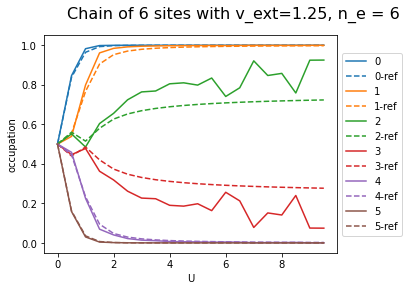

In [55]:

colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))


fig, ax = plt.subplots(1,1, figsize=(7,4))

for i in range(6):
    plt.plot(x, y_simple[:, i], c=mpl.cm.get_cmap('tab10')(i), label=str(i))
    plt.plot(x, y_ref[:, i], c=mpl.cm.get_cmap('tab10')(i), label=str(i)+'-ref', linestyle='--')
plt.xlabel("U")
# plt.xlim(-.6, 2.1)
plt.ylabel("occupation")
# plt.ylim(0,1)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(f'Chain of 6 sites with v_ext={pmv}, n_e = {n_electron}', fontsize=16)
plt.savefig(f'results/Chain1_filtered/Densities_U_ne-{n_electron}_v-ext-{pmv}_{str(step)}.png', dpi=150,  bbox_inches='tight')

# Density progression with iterations

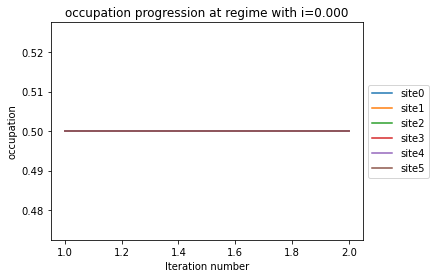

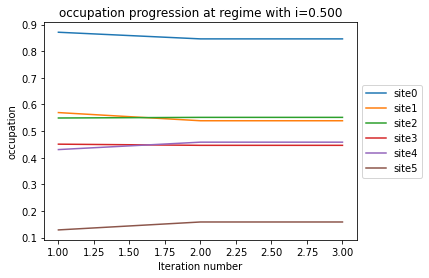

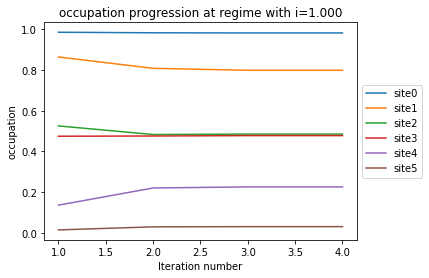

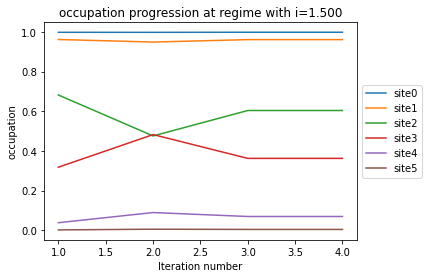

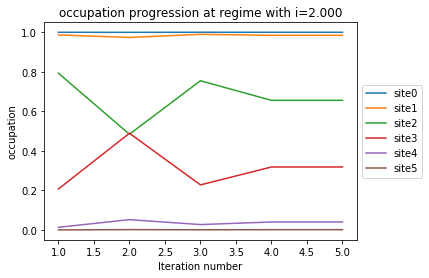

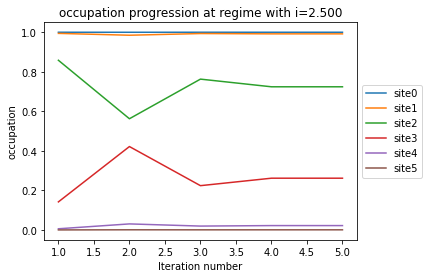

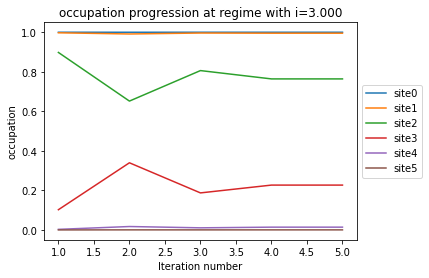

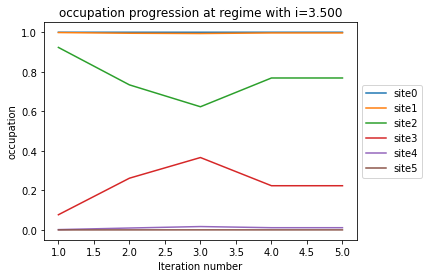

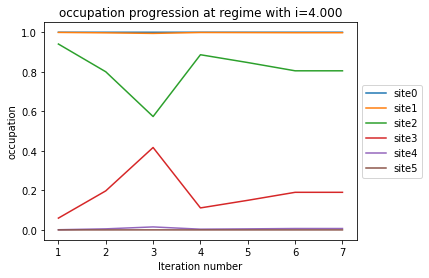

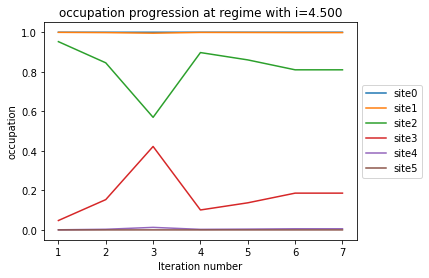

In [56]:
# one regime per picture
for x_i in range(10):
    fig, ax = plt.subplots(1,1,figsize=(7,4))
    norm = mpl.colors.Normalize(vmin=-0.05,  vmax=2.1)
    regime = y[x_i]
    v_ext = x[x_i]

    key_list = list()

    for site_id in range(6):
        length = len(regime)
        plt.plot(np.arange(len(regime))+1, regime[:,site_id], color=mpl.cm.tab10(site_id), label=f'site{site_id}')

    for key1 in  correction_dict_list[x_i].keys():
        iter_key, site_key = key1
        
        value = correction_dict_list[x_i][key1]
        plt.scatter([iter_key+1], [regime[iter_key,site_key]], c='r', s=20)


    plt.xlabel("Iteration number")
    plt.ylabel("occupation")
    plt.title(f'occupation progression at regime with i={v_ext:.3f}')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.savefig(f'results/Chain1_U-5/occupation(iter)_oscillations_regime-i-{v_ext:.3f}.png', dpi=150)


## Many random starting configurations
Random values from -0.05 to 0.05

In [118]:
experiment_number = 60

In [119]:
lpfet.COMPENSATION_1_RATIO = 0.5
i = 0.5
name = 'chain2'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
inp_values = []
nodes_dict = dict()
edges_dict = dict()
eq_list = []
for j in range(6):
    nodes_dict[j] = {'v': (j - 2.5) * i, 'U': 5}
    if j != 5:
        edges_dict[(j, j+1)] = 1
    eq_list.append([j])

for temp_var in range(experiment_number):
    if not first:
        mol1.clear_object(name)
    first = False
    print('\n',f'{temp_var/experiment_number*100:.1f}%', end=': ')
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    initial_v_hxc = np.random.random(6) * 0.1 - 0.05
    mol1.v_hxc = initial_v_hxc
    inp_values.append(initial_v_hxc)
    mol1.self_consistent_loop(num_iter=30, tolerance=1e-6, oscillation_compensation=1)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)

y_ab, rest =mol1.compare_densities_fci(pass_object=mol_full)
y_ab /= 2
y_ref = y_ab.diagonal()

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====

 0.0%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 1.7%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 3.3%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 5.0%: Loop 0, Loop 1, Loop 2, -0.32->-0.55->-0.40!=-0.24, Loop 3, Loop 4, Loop 5, 
 6.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 8.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 10.0%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 11.7%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 13.3%: Loop 0, Loop 1, Loop 2, -0.28->-0.54->-0.42!=-0.31, Loop 3, Loop 4, Loop 5, 
 15.0%: Loop 0, Loop 1, Loop 2, -0.26->-0.63->-0.41!=-0.19, Loop 3, Loop 4, Loop 5, 
 16.7%: Loop 0, Loop 1, -0.61->-0.36->-0.56!=-0.77, -0.41->-0.66->-0.49!=-0.31, Loop 2, Loop 3, Loop 4, Loop 5, 
 18.3%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 20.0%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 21.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 23.3%: Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, 
 25.0%: Loop 0, Loop

index 0: my result: 0.833, reference: 0.802; difference: 0.031, stdev: 0.009
index 1: my result: 0.540, reference: 0.548; difference: -0.008, stdev: 0.010
index 2: my result: 0.565, reference: 0.564; difference: 0.001, stdev: 0.009
index 3: my result: 0.443, reference: 0.436; difference: 0.008, stdev: 0.009
index 4: my result: 0.455, reference: 0.452; difference: 0.003, stdev: 0.007
index 5: my result: 0.164, reference: 0.198; difference: -0.034, stdev: 0.014


Text(0.5, 1.0, 'Density fluctuations with starting random v^Hxc between -0.05 and 0.05')

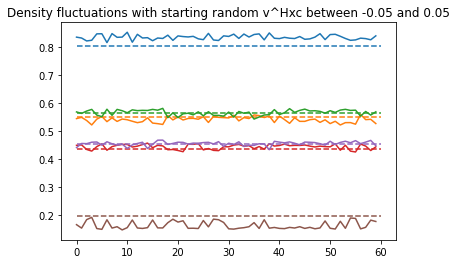

In [120]:

colors = mpl.cm.get_cmap('tab10')(5)

for i in range(6):
    plt.plot(y_simple[:,i], c=mpl.cm.get_cmap('tab10')(i))
    plt.hlines(y_ref[i], 0, experiment_number, color=mpl.cm.get_cmap('tab10')(i), linestyle='dashed')
    print(f'index {i}: my result: {np.average(y_simple[:,i]):.3f}, reference: {y_ref[i]:.3f}; difference: {np.average(y_simple[:,i])-y_ref[i]:.3f}, stdev: {np.std(y_simple[:,i]-y_ref[i]):.3f}')
plt.title('Density fluctuations with starting random v^Hxc between -0.05 and 0.05')

index 0: my result: 0.833, reference: 0.802; difference: 0.031, stdev: 0.009
index 1: my result: 0.540, reference: 0.548; difference: -0.008, stdev: 0.010
index 2: my result: 0.565, reference: 0.564; difference: 0.001, stdev: 0.009
index 3: my result: 0.443, reference: 0.436; difference: 0.008, stdev: 0.009
index 4: my result: 0.455, reference: 0.452; difference: 0.003, stdev: 0.007
index 5: my result: 0.164, reference: 0.198; difference: -0.034, stdev: 0.014


[(0.833279053730405,
  0.8024589129324315,
  0.03082014079797346,
  0.008797238083185947),
 (0.5396969379294876,
  0.5479496427957445,
  -0.008252704866256955,
  0.009802394649207766),
 (0.5652523491540742,
  0.5642716960686258,
  0.0009806530854483686,
  0.009420777833378623),
 (0.44327451836363935,
  0.4357283039313763,
  0.007546214432263054,
  0.008532324056456892),
 (0.4549360457820628,
  0.45205035720425757,
  0.0028856885778052455,
  0.007109482374282163),
 (0.1635610950403307,
  0.19754108706757023,
  -0.03397999202723953,
  0.013742324734577848)]

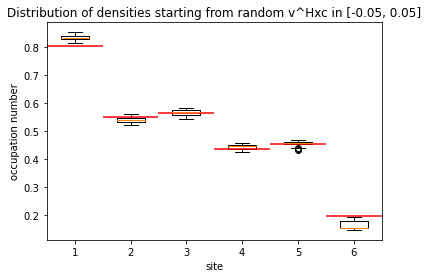

In [121]:
distribution_array_005 = []
plt.boxplot(y_simple)
for i in range(6):
    plt.hlines(y_ref[i], i+0.5, i+1.5, color='r')
    print(f'index {i}: my result: {np.average(y_simple[:,i]):.3f}, reference: {y_ref[i]:.3f}; difference: {np.average(y_simple[:,i])-y_ref[i]:.3f}, stdev: {np.std(y_simple[:,i]-y_ref[i]):.3f}')
    distribution_array_005.append((np.average(y_simple[:,i]), y_ref[i], np.average(y_simple[:,i])-y_ref[i], np.std(y_simple[:,i]-y_ref[i])))
plt.xlabel('site')
plt.ylabel('occupation number')
plt.title('Distribution of densities starting from random v^Hxc in [-0.05, 0.05]')
plt.savefig('results/Chain1/Distribution-densities_delta-0.05.png', dpi=150)
distribution_array_005

In [122]:
from sklearn.preprocessing import StandardScaler
pca_y = StandardScaler().fit_transform(y_simple) # normalizing the features

from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
principalComponents_pca_y = pca_model.fit_transform(pca_y)

[0.44222498 0.30140689]


Text(0.5, 1.0, 'PCA with starting configurations [-0.05, 0.05]')

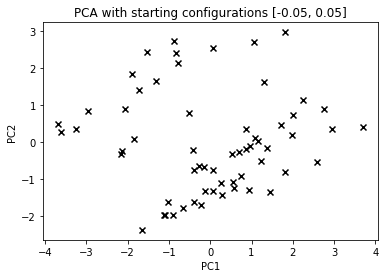

In [125]:
plt.scatter(principalComponents_pca_y[:,0], principalComponents_pca_y[:, 1], c='k', marker='x')
print(pca_model.explained_variance_ratio_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with starting configurations [-0.05, 0.05]')

In [126]:
lpfet.COMPENSATION_1_RATIO = 0.5
i = 0.5
name = 'chain2'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
inp_values = []
nodes_dict = dict()
edges_dict = dict()
eq_list = []
for j in range(6):
    nodes_dict[j] = {'v': (j - 2.5) * i, 'U': 5}
    if j != 5:
        edges_dict[(j, j+1)] = 1
    eq_list.append([j])

for temp_var in range(experiment_number):
    if not first:
        mol1.clear_object(name)
    first = False
    print('\n',f'{temp_var/experiment_number*100:.1f}%', end=': ')
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    initial_v_hxc = np.random.random(6) * 0.01 - 0.005
    mol1.v_hxc = initial_v_hxc
    inp_values.append(initial_v_hxc)
    mol1.self_consistent_loop(num_iter=30, tolerance=1e-6, oscillation_compensation=1)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)

y_ab, rest =mol1.compare_densities_fci(pass_object=mol_full)
y_ab /= 2
y_ref = y_ab.diagonal()

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====

 0.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 1.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 3.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 5.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 6.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 8.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 10.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 11.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 13.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 15.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 16.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 18.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 20.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 21.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 23.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 25.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 26.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 28.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 30.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 31.7%: Loop 0, Loop 1, Loop 2, Loop 3, 
 33.3%: Loop 0, Loop 1, Loop 2, Loop 3, 
 35.0%: Loop 0, Loop 1, Loop 2, Loop 3, 
 36.7%: L

index 0: my result: 0.828, reference: 0.802; difference: 0.025
index 1: my result: 0.538, reference: 0.548; difference: -0.010
index 2: my result: 0.570, reference: 0.564; difference: 0.006
index 3: my result: 0.446, reference: 0.436; difference: 0.010
index 4: my result: 0.465, reference: 0.452; difference: 0.012
index 5: my result: 0.153, reference: 0.198; difference: -0.044


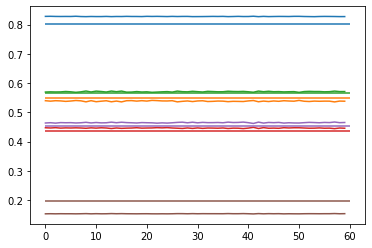

In [127]:
from matplotlib import cm
colors = cm.get_cmap('tab10')(5)

for i in range(6):
    plt.plot(y_simple[:,i], c=cm.get_cmap('tab10')(i))
    plt.hlines(y_ref[i], 0, experiment_number, color=cm.get_cmap('tab10')(i))
    print(f'index {i}: my result: {np.average(y_simple[:,i]):.3f}, reference: {y_ref[i]:.3f}; difference: {np.average(y_simple[:,i])-y_ref[i]:.3f}')

index 0: my result: 0.828, reference: 0.802; difference: 0.025, stdev: 0.000
index 1: my result: 0.538, reference: 0.548; difference: -0.010, stdev: 0.001
index 2: my result: 0.570, reference: 0.564; difference: 0.006, stdev: 0.001
index 3: my result: 0.446, reference: 0.436; difference: 0.010, stdev: 0.001
index 4: my result: 0.465, reference: 0.452; difference: 0.012, stdev: 0.001
index 5: my result: 0.153, reference: 0.198; difference: -0.044, stdev: 0.000


[(0.8276546488596443,
  0.8024589129324315,
  0.025195735927212803,
  0.00033048536114638265),
 (0.5381800649171872,
  0.5479496427957445,
  -0.009769577878557367,
  0.0013379295228897663),
 (0.5704699774036754,
  0.5642716960686258,
  0.006198281335049627,
  0.0011501067135211043),
 (0.4460830120329328,
  0.4357283039313763,
  0.010354708101556531,
  0.0008878072643542853),
 (0.4645463623761817,
  0.45205035720425757,
  0.012496005171924118,
  0.0010256944882945079),
 (0.15306593441037855,
  0.19754108706757023,
  -0.04447515265719168,
  0.0002604042993252579)]

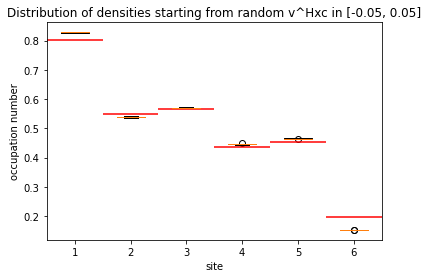

In [128]:
distribution_array_0005 = []
plt.boxplot(y_simple)
for i in range(6):
    plt.hlines(y_ref[i], i+0.5, i+1.5, color='r')
    print(f'index {i}: my result: {np.average(y_simple[:,i]):.3f}, reference: {y_ref[i]:.3f}; difference: {np.average(y_simple[:,i])-y_ref[i]:.3f}, stdev: {np.std(y_simple[:,i]-y_ref[i]):.3f}')
    distribution_array_0005.append((np.average(y_simple[:,i]), y_ref[i], np.average(y_simple[:,i])-y_ref[i], np.std(y_simple[:,i]-y_ref[i])))
plt.xlabel('site')
plt.ylabel('occupation number')
plt.title('Distribution of densities starting from random v^Hxc in [-0.05, 0.05]')
plt.savefig('results/Chain1/Distribution-densities_delta-0.005.png', dpi=150)
distribution_array_0005

In [129]:
distribution_array_0005 = np.array(distribution_array_0005)
distribution_array_005 = np.array(distribution_array_005)

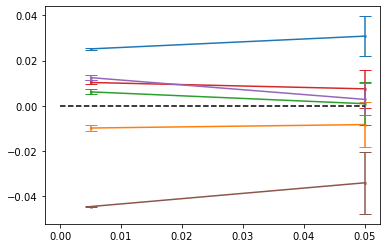

In [130]:
for i in range(6):
    plt.plot([0.005, 0.05], [distribution_array_0005[i, 2], distribution_array_005[i, 2]], c=mpl.cm.get_cmap('tab10')(i))
    plt.errorbar([0.005, 0.05], [distribution_array_0005[i, 2], distribution_array_005[i, 2]], [distribution_array_0005[i, 3], distribution_array_005[i, 3]], c=mpl.cm.get_cmap('tab10')(i), fmt='x', markersize=2, capsize=6)
plt.hlines(0, 0, 0.05, color='k', linestyle='dashed')

In [132]:

nodes_dict = {0:{'v': -2, 'U': 5}, 1:{'v': -4, 'U': 5}, 2:{'v': -2, 'U': 5}}
edges_dict = {(0,1):1, (1,2):1}
t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
essentials.print_matrix(t)

  +0.000   -1.000   +0.000
  -1.000   +0.000   -1.000
  +0.000   -1.000   +0.000
